# 3. Lasso Regression Analysis

## Setup

In [48]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [31]:
# Load data
ames_eng = pd.read_csv('data/Ames_Housing_Price_Data_eng.csv')

In [32]:
# Create the independent variables and the target
predictors = ames_eng.drop('SalePrice', axis=1)
target = ames_eng['SalePrice']

In [33]:
print(predictors.columns)

Index(['GrLivArea', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'YearsSinceBuilt', 'YearsSinceRemod', 'DateSold',
       'Period', 'crisis'],
      dtype='object', length=118)


In [34]:
# Categorize columns of the independent variables
numeric_columns = predictors.select_dtypes(['int64', 'uint8', 'float64']).columns
categorical_columns = predictors.columns.difference(numeric_columns)

## Preprocessing

#### Check for missing values

In [35]:
# Check for missing values
print(predictors.isnull().sum().sort_values(ascending=False).head(10))

GrLivArea               0
YrSold                  0
Neighborhood_GrnHill    0
Neighborhood_Greens     0
Neighborhood_Gilbert    0
Neighborhood_Edwards    0
Neighborhood_Crawfor    0
Neighborhood_CollgCr    0
Neighborhood_ClearCr    0
Neighborhood_BrkSide    0
dtype: int64


#### Dummify categorical variables

In [36]:
print(categorical_columns)

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'DateSold', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'PavedDrive', 'Period', 'PoolQC', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities'],
      dtype='object')


In [37]:
# Remove DateSold
predictors = predictors.drop('DateSold', axis=1)

In [39]:
# Re-categorize columns of the independent variables
numeric_columns = predictors.select_dtypes(['int64', 'uint8', 'float64']).columns
categorical_columns = predictors.columns.difference(numeric_columns)

In [40]:
# One-hot encode the categorical variables
encoded_categoricals = pd.get_dummies(predictors[categorical_columns], drop_first=True)

# Drop the original categorical variables
predictors = predictors.drop(categorical_columns, axis=1)

# Concatenate the one-hot encoded columns with the Dataframe
predictors = pd.concat([predictors, encoded_categoricals], axis=1)

In [41]:
# Re-categorize columns of the independent variables
numeric_columns = predictors.select_dtypes(['int64', 'uint8', 'float64']).columns
categorical_columns = predictors.columns.difference(numeric_columns)

In [42]:
print(categorical_columns)

Index([], dtype='object')


In [43]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 298 entries, GrLivArea to Utilities_NoSewr
dtypes: float64(11), int64(63), uint8(224)
memory usage: 2.0 MB


In [44]:
predictors.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,Street_Pave,Utilities_NoSewr
0,856,30,0.0,7890,6,1939,1950,0.0,238.0,0.0,...,0,0,0,0,0,0,0,1,1,0
1,1049,120,42.0,4235,5,1984,1984,149.0,552.0,393.0,...,0,0,0,0,0,0,0,1,1,0
2,1001,30,60.0,6060,9,1930,2007,0.0,737.0,0.0,...,0,0,0,0,0,0,0,1,1,0
3,1039,70,80.0,8146,8,1900,2003,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
4,1665,60,70.0,8400,6,2001,2001,0.0,643.0,0.0,...,0,0,0,0,0,0,0,1,1,0


#### Scaling

In [45]:
# Scale the numeric data
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

## Training the Lasso Model

In [49]:
# Set up the data for training
X = predictors # Use the unscaled data b/c LassoCV will scale it automatically
y = target

In [50]:
# Initialize the Lasso model with cross-validation
alphas = np.logspace(-4, 1, 20)
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=0, normalize=True)

In [51]:
# Fit the model
lasso_cv.fit(X, y)

/Users/georgeho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2002297606.0701904, tolerance: 1095952598.418339
  model = cd_fast.enet_coordinate_descent_gram(
/Users/georgeho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2894926475.1486816, tolerance: 1095952598.418339
  model = cd_fast.enet_coordinate_descent_gram(
/Users/georgeho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3107741398.4575195, tolerance: 1095952598.418339
  model = cd_fast.enet_coordinate_descent_gram(
/Users/georgeho/opt/anaconda3/lib/python3.9/si

LassoCV(alphas=array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01]),
        cv=5, max_iter=10000, normalize=True, random_state=0)

In [53]:
# Print the Intercept
print('Intercept:', lasso_cv.intercept_)

Intercept: -664766.0089861852


In [54]:
# Print the Slopes
lassoCoef = pd.Series(lasso_cv.coef_, index=predictors.columns)
print('Slopes:', lasso_cv.coef_)

Slopes: [ 5.15057195e+01 -7.24315300e+01  1.61301224e+01  4.63873070e-01
  6.40828957e+03  2.98986385e+02  7.81646453e+01  1.92398124e+01
  2.01659548e+01  1.32700137e+01 -0.00000000e+00  1.72700087e+01
  0.00000000e+00  2.97209768e+00 -1.77104322e+01  1.48789178e+03
  0.00000000e+00  1.53880559e+03  9.57254201e+02 -2.78644705e+03
 -9.11866030e+03  6.33417326e+02  6.19706107e+03 -0.00000000e+00
  3.39524873e+03  1.19677504e+01  4.26846510e+00 -0.00000000e+00
  1.29856501e+01  2.13182501e+01  3.83247403e+01 -8.81041879e+01
  4.33784943e-01 -0.00000000e+00  0.00000000e+00  7.65901418e+03
  8.73434627e+03  4.60187209e+03  3.15722549e+03 -0.00000000e+00
  1.64559276e+04 -7.60280538e+03 -0.00000000e+00  1.63533414e+02
  1.09589142e+05 -0.00000000e+00  9.08984299e+02 -0.00000000e+00
 -3.03715267e+03 -4.25248914e+03  1.38726959e+04 -1.81101941e+03
  2.74537997e+04  1.87432261e+04 -5.49060422e+03 -3.38641223e+03
  0.00000000e+00 -0.00000000e+00  1.90511144e+04  3.61131564e+04
  1.09983930e+03 

In [55]:
# Print the Scores
print('R^2:', lasso_cv.score(X, y))
print('RMSE:', np.sqrt(mean_squared_error(y, lasso_cv.predict(X))))

R^2: 0.9390481610168727
RMSE: 18523.832993391734


In [56]:
# Print the Optimal Value of Alpha
print('Optimal alpha:', lasso_cv.alpha_)

Optimal alpha: 2.9763514416313193


In [69]:
# Find the top 10 features
lassoCoef[lassoCoef > 0].sort_values(ascending=False).head(10)

Neighborhood_GrnHill    109589.142017
OverallQual_10           88205.819147
OverallQual_9            59690.067012
RoofMatl_WdShngl         47200.565148
Exterior1st_PreCast      46983.438963
Neighborhood_StoneBr     36113.156360
Condition2_PosA          34078.667596
Neighborhood_NoRidge     27453.799688
RoofMatl_Membran         27228.851306
OverallQual_8            22382.304018
dtype: float64

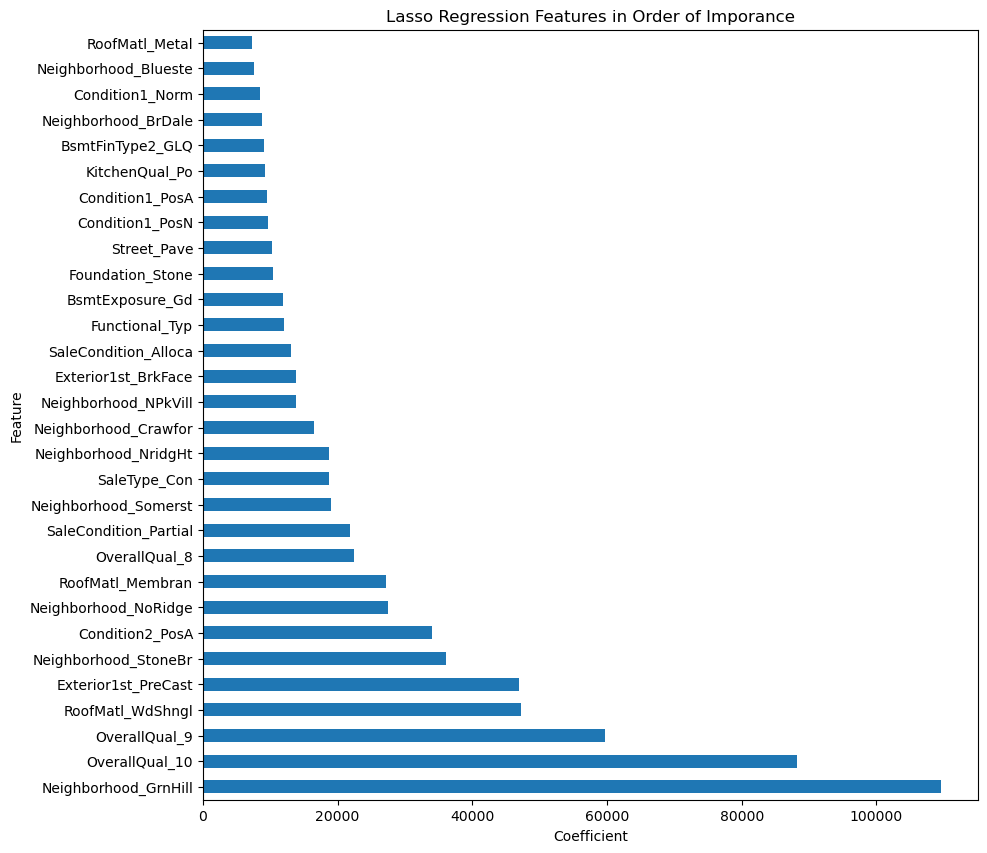

In [71]:
# Get the features with coefficients greater than 0, sort them, and keep the top 30
features = lassoCoef[lassoCoef > 0]
features = features.sort_values(ascending=False)
features = features[:30]

# Create a bar chart
features.plot(kind='barh', figsize=(10, 10))

# Labels and titles
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Lasso Regression Features in Order of Imporance')

# Show the plot
plt.show()

----

## Save All Numeric Dataset

We will save the current dataset for use in other ML models

In [73]:
# Combine features and target together for a new dataframe
ames_all_numeric = pd.concat([predictors, target], axis=1)

In [74]:
# View ames_all_numeric columns
print(ames_all_numeric.columns)

Index(['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_VWD', 'SaleType_WD ', 'Street_Pave',
       'Utilities_NoSewr', 'SalePrice'],
      dtype='object', length=299)


In [75]:
# Check that all columns are numeric
print(ames_all_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 299 entries, GrLivArea to SalePrice
dtypes: float64(11), int64(64), uint8(224)
memory usage: 2.0 MB
None


In [76]:
# Save ames_all_numeric to a csv file
ames_all_numeric.to_csv('data/Ames_Housing_Price_Data_all_numeric.csv', index=False)